In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
import csv

def file_to_list(file):
    data = []
    print(file)
    f = open(file, 'rU')
    contents = csv.reader(f.read().splitlines())
    count = 0
    try:
        for c in contents:
            count += 1
            data.append(c)
    except Exception as e:
        print("count",count)
        raise e

    return data

def important_lists(data):
    likes = []
    followers = []
    count = 0
    try:
        for d in data:
            count += 1
            likes.append(int(d[1]))
            followers.append(int(d[7]))
    except Exception as e:
        print("count", count)
        raise e
    return likes, followers

data = file_to_list('posts_filtered.csv')
likes, followers = important_lists(data)
concepts = np.loadtxt('sconcepts.csv',delimiter=',', dtype=np.float32)
Y = np.array(likes[:])

likes = np.array(likes)
followers = np.array(followers)
followers = followers.reshape(1500,10)
likes = likes.reshape(1500,10)
for i in range(len(likes)):
    likes[i] = np.repeat(np.mean(likes[i]),10)
likes = likes.reshape(15000,)
followers = followers.reshape(15000,)
mlikes = np.mean(Y)
sdlikes = np.std(Y)
likes = (likes - np.mean(likes)) / np.std(likes)
followers = (followers - np.mean(followers)) / np.std(followers)
concepts = (concepts - np.mean(concepts)) / np.std(concepts)
Y = (Y-np.mean(Y))/np.std(Y)

X = []
for i in range(len(concepts)):
    x=np.hstack((concepts[i],likes[i]))
    x=np.hstack((x,followers[i]))
    X.append(x)
X = np.array(X)
print(X.shape)
print(X)



posts_filtered.csv


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 'U' mode is deprecated


(15000, 575)
[[-0.11232649 -0.080576   -0.10812723 ..., -0.10728981  0.05517381
   0.26519582]
 [-0.11550212 -0.11269207 -0.11399331 ..., -0.10567145  0.05517381
   0.26519582]
 [-0.113627   -0.10881187 -0.09144271 ..., -0.08886152  0.05517381
   0.26519582]
 ..., 
 [-0.11263549 -0.1085724  -0.09223315 ..., -0.1009998  -0.20741918
  -0.16748031]
 [-0.11591945 -0.11602373 -0.11277547 ..., -0.10263075 -0.20741918
  -0.16748031]
 [-0.11586875 -0.11601422 -0.09755899 ..., -0.11348407 -0.20741918
  -0.16748031]]


In [3]:
num_training = 12500
X_train = X[:num_training]
Y_train = Y[:num_training]
X_test = X[num_training:]
Y_test = Y[num_training:]



In [4]:
regressor = RandomForestRegressor(n_estimators=150)
regressor.fit(X_train, Y_train)
y = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))
print('predicted :',y[:5])
print("label :",Y_test[:5])
print("AVERAGE DIFFERENCE B/W PREDICTED VALUE & ACTUAL LABEL:")
print( sum( [abs( y[i] - Y_test[i]) for i in range(len(y)) ] ) / len(y) )

0.927477239022
predicted : [-0.21298604 -0.21298604 -0.21298604 -0.21298604 -0.21298604]
label : [-0.21327022 -0.21328647 -0.21328105 -0.21328105 -0.21328647]
AVERAGE DIFFERENCE B/W PREDICTED VALUE & ACTUAL LABEL:
0.0693854827763


In [9]:

for t in range(500,600):
    pv = regressor.predict(X[t])
    pv = pv * sdlikes + mlikes
    print("predicted :",pv," // real :", Y[t]*sdlikes + mlikes)


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 5034.02203968]  // real : 4310.0
predicted : [ 7589.65769601]  // real : 8209.0
predicted : [ 5361.65178571]  // real : 4820.0
predicted : [ 5965.15657998]  // real : 5685.0
predicted : [ 6252.93772487]  // real : 6519.0
predicted : [ 7237.25193506]  // real : 7765.0
predicted : [ 5698.40333862]  // real : 5394.0
predicted : [ 6561.98886893]  // real : 6424.0
predicted : [ 5798.12394444]  // real : 5363.0
predicted : [ 8482.6851657]  // real : 9320.0
predicted : [ 59.45805665]  // real : 10.0
predicted : [ 59.45805665]  // real : 26.0
predicted : [ 59.45805665]  // real : 30.0
predicted : [ 59.45805665]  // real : 10.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 59.45805665]  // real : 4.0
predicted : [ 59.45805665]  // real : 6.0
predicted : [ 59.45805665]  // real : 7.0
predicted : [ 59.45805665]  // real : 12.0
predicted : [ 59.45805665]  // real : 3.0
predicted : [ 59.45805665]  // real : 6.0
predicted : [ 297810.80666667]  // real : 240497.0
predicted : [ 360184.12111111]  // real : 282528.0
predicted : [ 339473.71666667]  // real : 314427.0
predicted : [ 333544.32666667]  // real : 303328.0
predicted : [ 405655.58666667]  // real : 411449.0
predicted : [ 376902.36]  // real : 367659.0
predicted : [ 365051.51966667]  // real : 371919.0
predicted : [ 386272.43333333]  // real : 388674.0
predicted : [ 461312.15111111]  // real : 442838.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 615052.85222222]  // real : 797528.0
predicted : [ 19903.81547619]  // real : 9097.0
predicted : [ 49655.45333333]  // real : 56557.0
predicted : [ 49582.76]  // real : 56830.0
predicted : [ 73856.41333333]  // real : 94097.0
predicted : [ 52359.58722222]  // real : 59605.0
predicted : [ 25731.33633333]  // real : 18934.0
predicted : [ 33010.56744444]  // real : 30263.0
predicted : [ 27334.14122222]  // real : 16719.0
predicted : [ 22227.40288889]  // real : 11245.0
predicted : [ 25601.38138889]  // real : 18000.0
predicted : [ 44051.17111111]  // real : 27036.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 119056.15666667]  // real : 146415.0
predicted : [ 36737.824]  // real : 22666.0
predicted : [ 48024.24928571]  // real : 34013.0
predicted : [ 35854.93334921]  // real : 30215.0
predicted : [ 36453.92888889]  // real : 25557.0
predicted : [ 107481.44222222]  // real : 131643.0
predicted : [ 32062.98666667]  // real : 14834.0
predicted : [ 78722.09711111]  // real : 73836.0
predicted : [ 106322.42666667]  // real : 130874.0
predicted : [ 243947.68666667]  // real : 230913.0
predicted : [ 323563.30555556]  // real : 353947.0
predicted : [ 270436.57333333]  // real : 258116.0
predicted : [ 248697.04]  // real : 232093.0
predicted : [ 303725.616]  // real : 316417.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 201407.44666667]  // real : 158455.0
predicted : [ 327542.7]  // real : 337308.0
predicted : [ 180939.65333333]  // real : 141372.0
predicted : [ 291171.47666667]  // real : 287834.0
predicted : [ 323096.6]  // real : 355639.0
predicted : [ 108.54735143]  // real : 103.0
predicted : [ 108.54735143]  // real : 107.0
predicted : [ 108.54735143]  // real : 208.0
predicted : [ 108.54735143]  // real : 128.0
predicted : [ 108.54735143]  // real : 170.0
predicted : [ 108.54735143]  // real : 135.0
predicted : [ 108.54735143]  // real : 120.0
predicted : [ 108.54735143]  // real : 122.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 108.54735143]  // real : 182.0
predicted : [ 108.54735143]  // real : 153.0
predicted : [ 4203.86987302]  // real : 3253.0
predicted : [ 5043.87943579]  // real : 4623.0
predicted : [ 9507.19827778]  // real : 10821.0
predicted : [ 4249.39779365]  // real : 3473.0
predicted : [ 7861.52733862]  // real : 8430.0
predicted : [ 7294.38677737]  // real : 7198.0
predicted : [ 7069.93693651]  // real : 7169.0
predicted : [ 6153.26126984]  // real : 6192.0
predicted : [ 6711.07442857]  // real : 6856.0
predicted : [ 4811.30107143]  // real : 3967.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

predicted : [ 957.39584878]  // real : 909.0
predicted : [ 988.373956]  // real : 989.0
predicted : [ 779.75697326]  // real : 717.0
predicted : [ 1001.07671395]  // real : 1096.0
predicted : [ 700.40575611]  // real : 615.0
predicted : [ 1375.13347903]  // real : 1636.0
predicted : [ 641.13038181]  // real : 481.0
predicted : [ 998.16443671]  // real : 1006.0
predicted : [ 767.09327172]  // real : 616.0
predicted : [ 1016.70314309]  // real : 1152.0
predicted : [ 10378.79866667]  // real : 8643.0
predicted : [ 14445.01922222]  // real : 14280.0
predicted : [ 12712.0502963]  // real : 12731.0
predicted : [ 12494.74234921]  // real : 11421.0
predicted : [ 14851.47587302]  // real : 16168.0
predicted : [ 13572.57550794]  // real : 13721.0
predicted : [ 17050.45084656]  // real : 18912.0
predicted : [ 11400.91877778]  // real : 10453.0
predicted : [ 14582.70719048]  // real : 15898.0
predicted : [ 11366.58977778]  // real : 9860.0


/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

/Users/song-isong-i/anaconda/envs/cnnPy3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


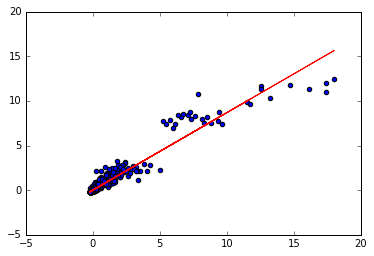

In [8]:
#import pylab
#%pylab inline
#pylab.plot(Y_test, y, 'go')
#pylab.legend()
#pylab.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fit = np.polyfit(Y_test, y, deg=1)
ax.plot(Y_test, fit[0] * Y_test + fit[1], color='red')
ax.scatter(Y_test, y)

fig.show()